In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
num_lables = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
image_size = X_train.shape[1]
X_train = np.reshape(X_train, [-1, image_size, image_size, 1])
X_test = np.reshape(X_test, [-1, image_size, image_size, 1])
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
image_size

28

In [7]:
input_shape = (image_size, image_size, 1)
batch_size = 32
kernal_size = 3
dropout = 0.25
n_filters = 32

In [8]:
left_input = Input(shape=input_shape)
x = left_input
filters = n_filters
for i in range(3):
    x = Conv2D(filters=filters, kernel_size = kernal_size, padding='same',
               activation = 'relu')(x)
    x = Dropout(dropout)(x)
    x = MaxPooling2D()(x)
    filters *= 2

In [9]:
right_inputs = Input(shape=input_shape)
y = right_inputs
filters = n_filters
for i in range(3):
    y = Conv2D(filters=filters, kernel_size = kernal_size, padding='same',
               activation = 'relu', dilation_rate= 2)(y)
    y = Dropout(dropout)(y)
    y = MaxPooling2D()(y)
    filters *= 2

In [10]:
y = concatenate([x, y])
y = Flatten()(y)
y = Dropout(dropout)(y)

In [11]:
output = Dense(num_lables, activation='softmax')(y)

In [12]:
model = Model([left_input, right_inputs], output)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 32)   320         input_2[0][0]                    
______________________________________________________________________________________________

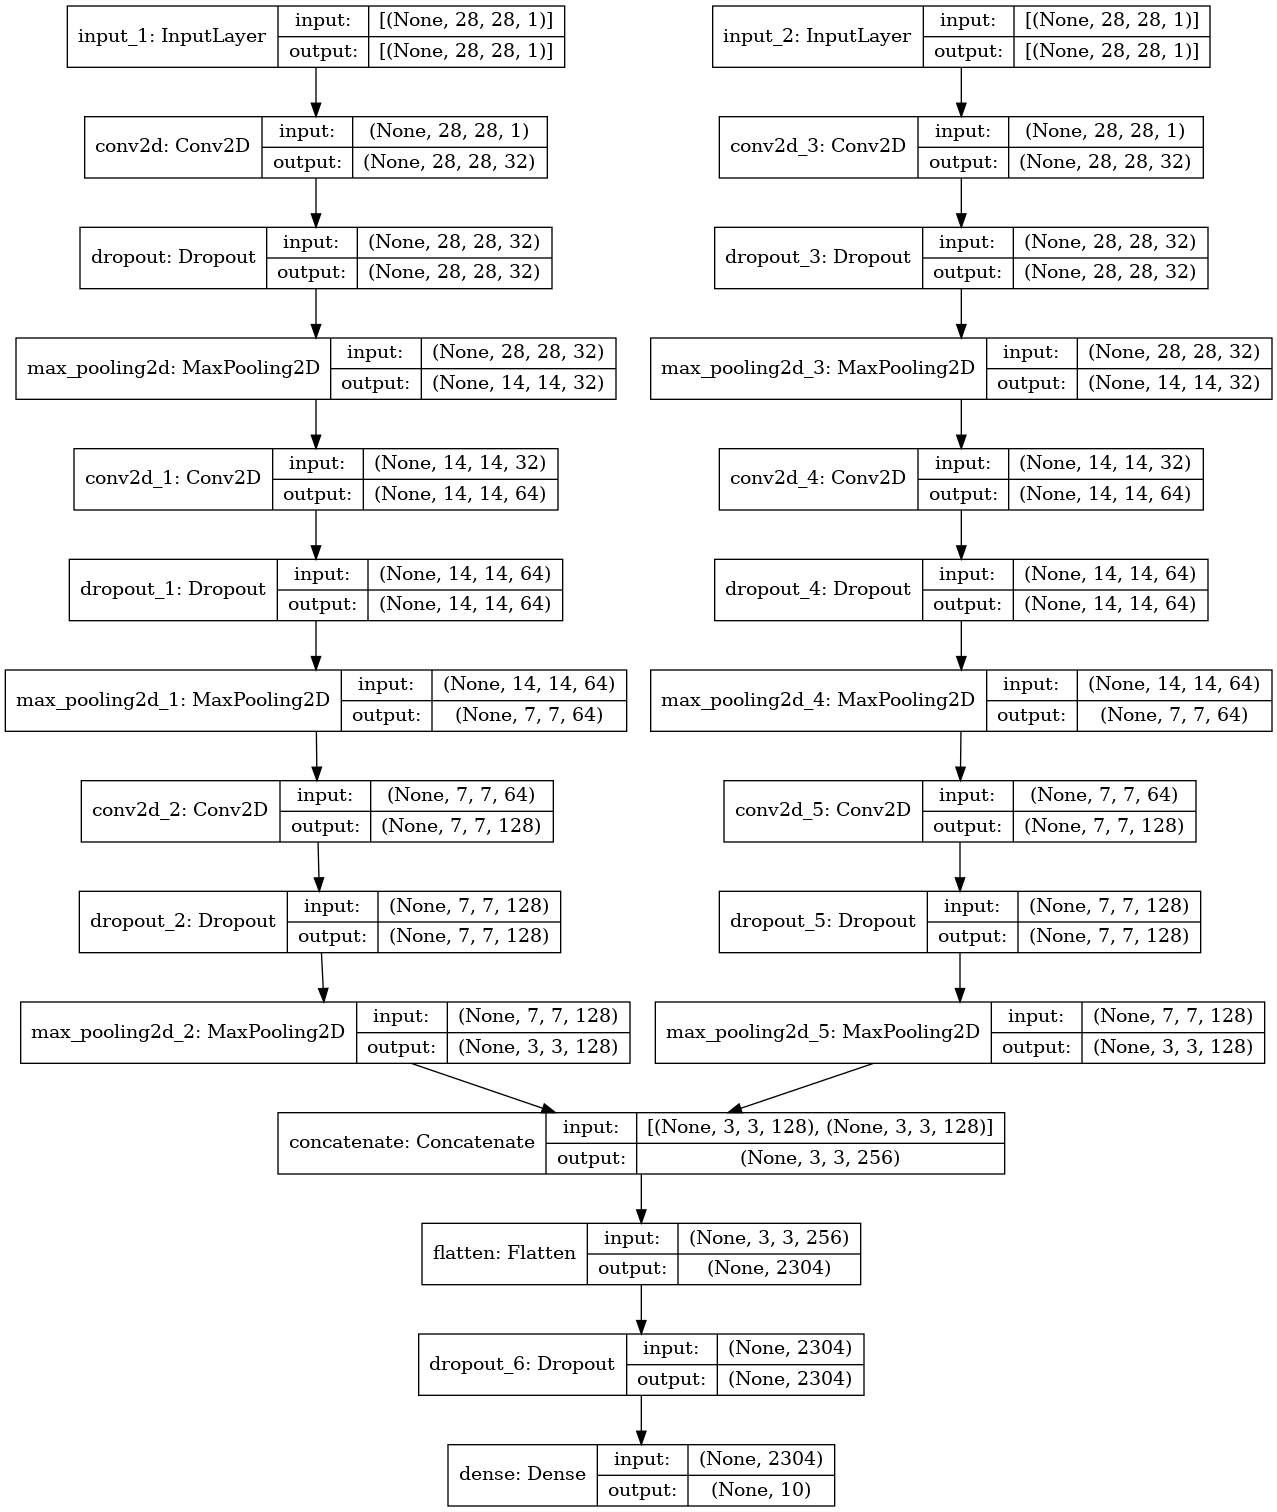

In [14]:
plot_model(model, to_file='mnist.png', show_shapes=True)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.fit([X_train,X_train], y_train, validation_data=([X_val,X_val], y_val), epochs=20, batch_size = batch_size)

Epoch 1/20
1500/1500 [==============================] - 93s 62ms/step - loss: 0.3719 - accuracy: 0.8811 - val_loss: 0.1083 - val_accuracy: 0.9835
Epoch 2/20
1500/1500 [==============================] - 94s 63ms/step - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.0717 - val_accuracy: 0.9871
Epoch 3/20
1500/1500 [==============================] - 92s 61ms/step - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.0401 - val_accuracy: 0.9883
Epoch 4/20
1500/1500 [==============================] - 92s 61ms/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.0415 - val_accuracy: 0.9899
Epoch 5/20
1500/1500 [==============================] - 98s 65ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.0346 - val_accuracy: 0.9911
Epoch 6/20
1500/1500 [==============================] - 112s 75ms/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.0308 - val_accuracy: 0.9911
Epoch 7/20
1500/1500 [==============================] - 108s 72ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0266

In [19]:
score = model.evaluate([X_test, X_test],y_test,batch_size=batch_size,verbose=0)

In [22]:
score[1]*100

99.14000034332275

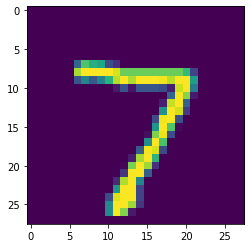

In [23]:
plt.imshow(X_test[0])

In [25]:
y_pred = model.predict([X_test,X_test])

In [27]:
y_pred = y_pred.argmax(axis=-1)

In [28]:
y_pred[0]

7

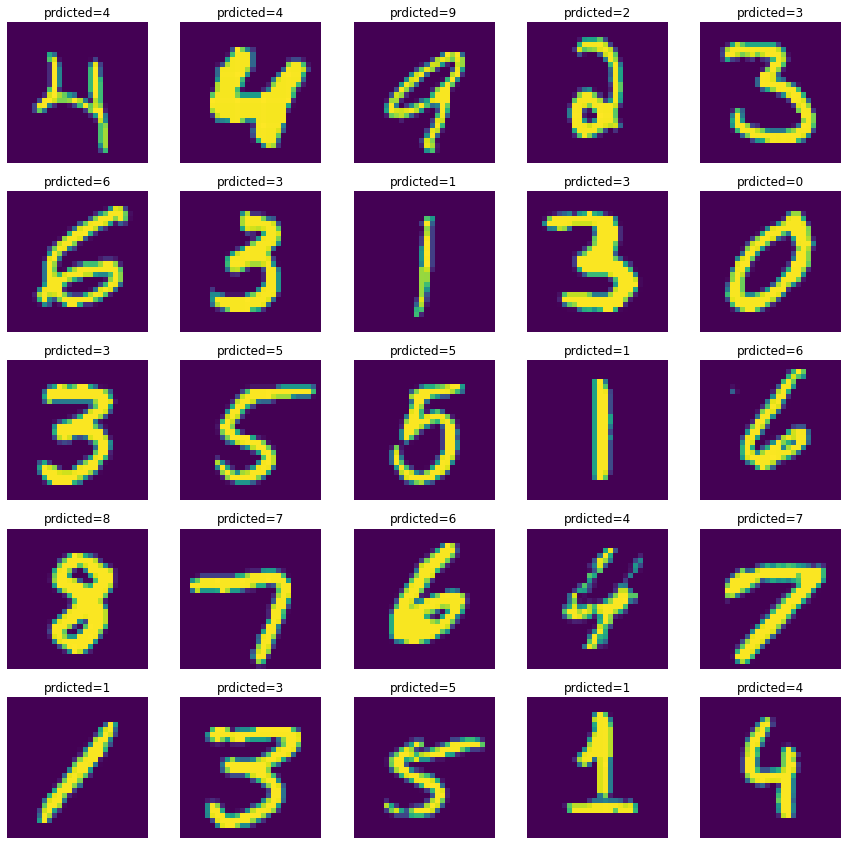

In [39]:
plt.figure(figsize=(15,15))
for i in range(25):
    
    plt.imshow(X_test[rand])
    plt.axis('off')

In [154]:
img = cv2.imread('eight.png')

In [166]:
y0 = model.predict([img,img])
y= y0.argmax(axis=-1)

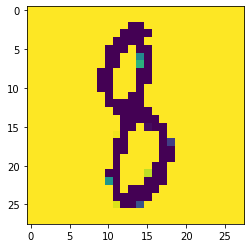

In [167]:
plt.imshow(np.reshape(img,[28,28,1]))

In [168]:
y[0]

8